### 1) Predicting the home prices of the given dataset

In [58]:
# importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [59]:
# reading the data
home_data=pd.read_csv("homeprices.csv")
home_data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [60]:
# checking for the null values
home_data.isnull().sum() 

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [61]:
# filling the null value with the median of the data pints
# mode_null=home_data.bedrooms.mode()
# mode_null

median_null=home_data.bedrooms.median()
median_null

# mean_null=home_data.bedrooms.mean()
# mean_null

4.0

In [62]:
# now filling the missing data
home_data.bedrooms=home_data.bedrooms.fillna(median_null)

# again checking whether the values are filled or not
home_data.isnull().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

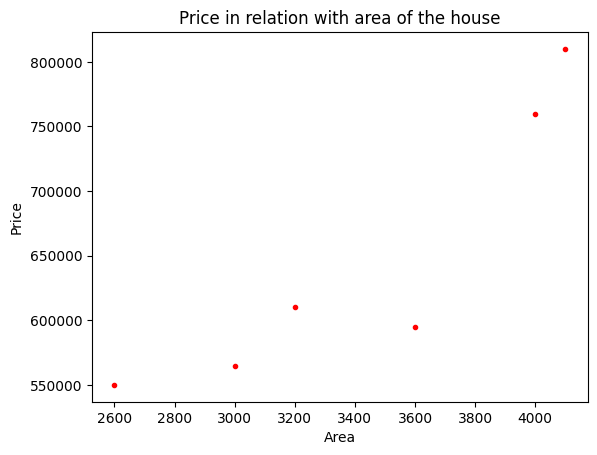

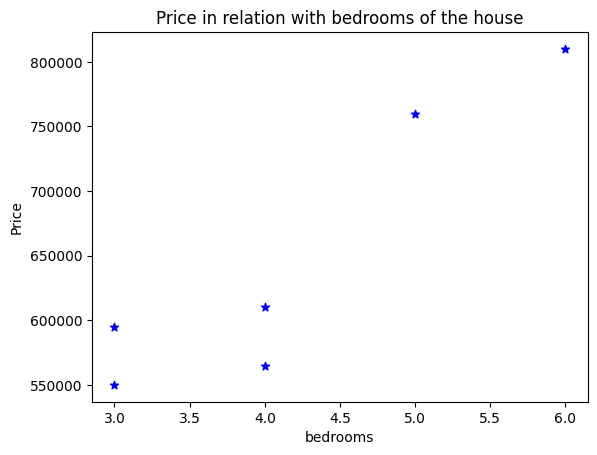

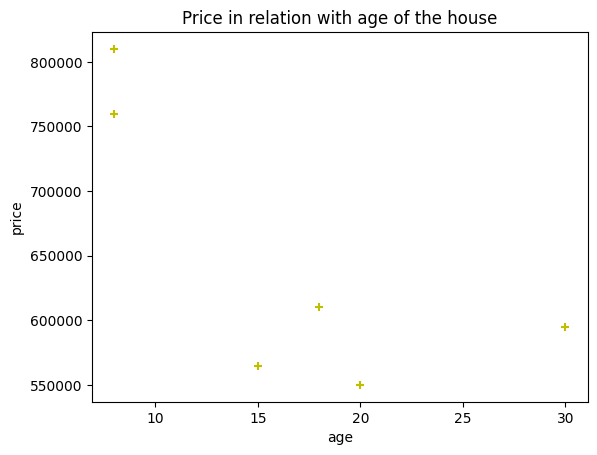

In [63]:
# some visualiztaions
# price in relation with area
plt.scatter(home_data['area'], home_data['price'], marker='.', color='r')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price in relation with area of the house")
plt.show()

# price in relation with bedrooms
plt.scatter(home_data['bedrooms'], home_data['price'], marker='*', color='b')
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.title("Price in relation with bedrooms of the house")
plt.show()

# price in relation with age of the house
plt.scatter(home_data['age'], home_data['price'], marker='+', color='y')
plt.xlabel("age")
plt.ylabel("price")
plt.title("Price in relation with age of the house")
plt.show()



In [64]:
# separating the X and y values
X=pd.DataFrame(home_data[['area', 'bedrooms', 'age']])
y=pd.DataFrame(home_data.price)


In [65]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [66]:
# now training the model using linear regression model
home_model=LinearRegression()
home_model.fit(X_train, y_train)

LinearRegression()

In [67]:
home_data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [68]:
# predicting the price of the given area and age, bedrooms
# home_model.predict(X_test)

array([[473548.75921956]])

In [76]:
# all predictions
home_model_predictions=home_model.predict(X)

In [77]:
# checking the accuracy of the model
accuracy=r2_score(y, home_model_predictions)
accuracy*100

89.76569721338178

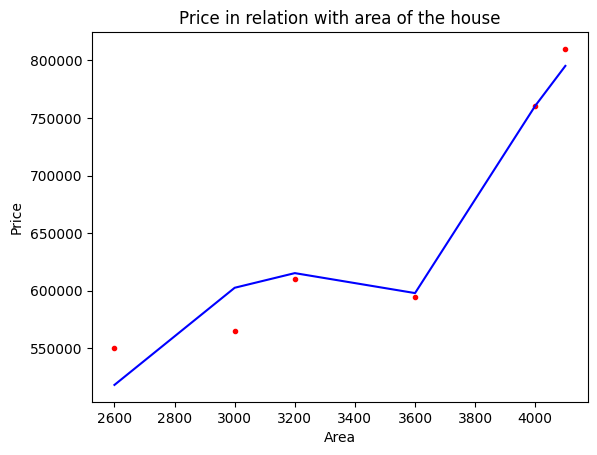

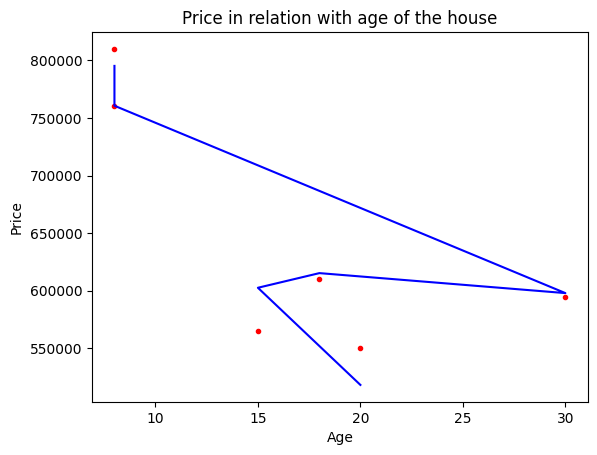

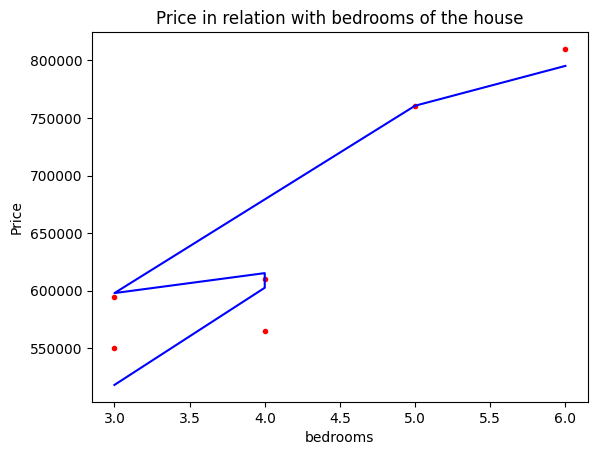

In [ ]:
# now sketching the best fit line for each graph
plt.scatter(home_data['area'], home_data['price'], marker='.', color='r')
plt.plot(home_data['area'], home_model_predictions, color='b')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Price in relation with area of the house")
plt.show()

plt.scatter(home_data['age'], home_data['price'], marker='.', color='r')
plt.plot(home_data['age'], home_model_predictions, color='b')
plt.xlabel("Age")
plt.ylabel("Price")
plt.title("Price in relation with age of the house")
plt.show()

plt.scatter(home_data['bedrooms'], home_data['price'], marker='.', color='r')
plt.plot(home_data['bedrooms'], home_model_predictions, color='b')
plt.xlabel("bedrooms")
plt.ylabel("Price")
plt.title("Price in relation with bedrooms of the house")
plt.show()

### 2) Hiring candidate prediction model

In [ ]:
# readaing the file
data=pd.read_csv("hiring.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
# renaming column names for our ease
data.rename(columns={'test_score(out of 10)':"test_score", 'interview_score(out of 10)':'interview_score', 'salary($)':"salary"}, inplace=True)

In [ ]:
# check for the null values
data.isnull().sum()

experience         2
test_score         1
interview_score    0
salary             0
dtype: int64

In [ ]:
# fill the null values of test_score firts
fill_by_median=data.test_score.median()

# fill now
data.test_score=data.test_score.fillna(fill_by_median)

# fill the experience values with 0
data.experience=data.experience.fillna('zero')

# check for the null values
data.isnull().sum()

experience         0
test_score         0
interview_score    0
salary             0
dtype: int64

In [ ]:
# now the experince column contains the categorical numberic data
# we have to change it into the integers to create the model
from word2number import w2n

data.experience=data.experience.apply(w2n.word_to_num)

In [ ]:
data

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
# now making the model
data_model=LinearRegression()
data_model.fit(data[['experience', 'test_score', 'interview_score']], data['salary'])

LinearRegression()

In [ ]:
data_model.predict([[2, 9, 6]])

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])